In [61]:
# We are predicting percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.ticker as mtic
import matplotlib.pyplot as plot

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [62]:
telecomDf = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecomDf.head()
# Lets examine variables for feature selection
#telecomDf.columns.values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
# Now lets explore if is there any missing or null values 
telecomDf.isna().any() # All False confirm there is no missing values

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

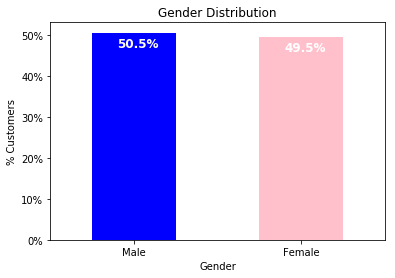

In [64]:
'''
Data Exploration
Lets understand the dataset, to better understanding of patterns in the data and potentially form hypothesis

1. Demographic on gender,age,range,partner and dependent status
'''
# a) Gender variable Distribution
colors = ['#0000FF','#FFC0CB']
axis=((telecomDf['gender'].value_counts() * 100.0)/len(telecomDf)).plot(kind='bar',stacked=True,rot=0,color=colors)
axis.yaxis.set_major_formatter(mtic.PercentFormatter()) # for percentage look
axis.set_xlabel('Gender')
axis.set_ylabel('% Customers')
axis.set_title('Gender Distribution')


# Percentage should be mention on bar
# create list to collect the plt.patches data
patch = []
for p in axis.patches:
    patch.append(p.get_width())
patchSum=sum(patch)

for i in axis.patches:
    # get_width pulls left or right; get_y pushes up or down
    axis.text(i.get_x()+.15, i.get_height()-3.5, \
    str(round((i.get_height()/patchSum), 1))+'%',fontsize=12,color='white',weight = 'bold')

# Conclusion: About half of the customers in our data set are male while the other half are female.

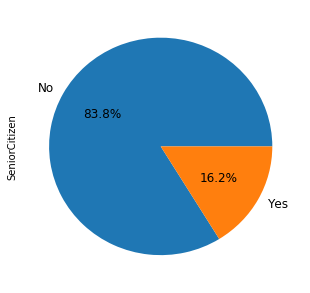

In [65]:
# b) Senior Citizen Variable: Demographic Report on Telecom data customers are sr.Citizen 
axis = (telecomDf['SeniorCitizen'].value_counts() * 100.0 / len(telecomDf)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'] ,figsize =(5,5), fontsize = 12)
# Conclusion: There are only 16.2% of customer who are senior citizen. thus,most of the customers in data are younger people.

'\nConclusion\n About 50% of the customers have a partner, while only 30% of the total customers have dependents.\n Q What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.\n A. Interestingly, among the customers who have a partner, only about half of them also have a dependent, \n while other half do not have any independents. \n Additionally, as expected, among the customers who do not have any partner, \n a majority (80%) of them do not have any dependents .\n '

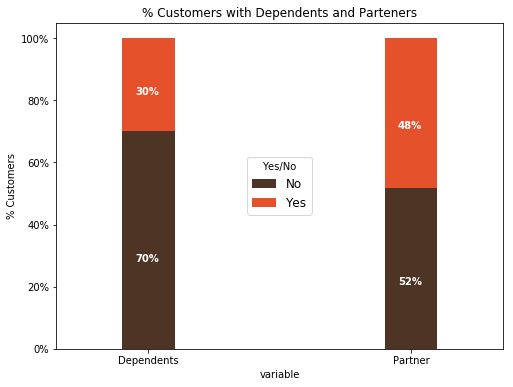

In [66]:
#c. Partner and dependent status variable 
# melt massage a DataFrame into a format where one or more columns are identifier variables(id_vars) others considered as  considered measured variables (value_vars)
df1 = pd.melt(telecomDf, id_vars=['customerID'],value_vars=['Dependents','Partner'])
df2 = df1.groupby(['variable','value']).count().unstack()
df2 = df2*100/len(telecomDf)
colors = ['#4D3425','#E4512B']
axis = df2.loc[:,'customerID'].plot.bar(stacked=True, color=colors,figsize=(8,6),rot=0,width = 0.2)
axis.yaxis.set_major_formatter(mtic.PercentFormatter())
axis.set_ylabel("% Customers")
axis.set_title("% Customers with Dependents and Parteners")
axis.legend(loc='center',prop={'size':12},title="Yes/No")




for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')
'''
Conclusion
 About 50% of the customers have a partner, while only 30% of the total customers have dependents.
 Q What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.
 A. Interestingly, among the customers who have a partner, only about half of them also have a dependent, 
 while other half do not have any independents. 
 Additionally, as expected, among the customers who do not have any partner, 
 a majority (80%) of them do not have any dependents .
 '''
# I also looked at any differences between the % of customers with/without dependents and partners by gender. There is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.


Text(0.5,1,'Count of  Customers by their tenure')

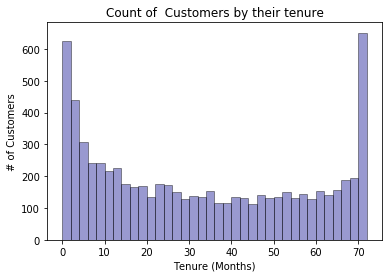

In [67]:
'''
2. Customer Account Information: Contract, Tenure 
a. Tenure
'''
axis = sns.distplot(telecomDf['tenure'],hist=True,kde=False,bins=int(180/5),color='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})
axis.set_ylabel("# of Customers")
axis.set_xlabel("Tenure (Months)")
axis.set_title("Count of  Customers by their tenure")
# Conclusion After looking at below histogram we can see that a lot of customers have been with telecom company for just a month while many are there for 72 months.



In [ ]:
# Number of customers by Contracts 
axis = telecomDf['Contract'].value_counts().plot(kind='bar',rot=0,width=0.3)
axis.set_ylabel('# of customers')
axis.set_title("# of customers by contract")

In [ ]:
fig, (ax1,ax2,ax3)  = plot.subplots(nrows=1,ncols=3,sharey=True,figsize=(20,4))
ax = sns.distplot(telecomDf[telecomDf['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')


ax = sns.distplot(telecomDf[telecomDf['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')
ax = sns.distplot(telecomDf[telecomDf['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')
                  
'''
Conclusion: Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.
'''


In [ ]:
# Check InternetService Variable 
telecomDf[["InternetService","OnlineSecurity","Churn"]].head(20)